In [1]:
import pandas as pd
from datetime import datetime, timedelta
%matplotlib inline
import json
import matplotlib.pyplot as plt
import pickle

In [2]:
complete_df = pd.read_csv("data/116_edit",sep = "\t" , header = 0).set_index("Unnamed: 0")
del complete_df.index.name
# complete_df = complete_df.set_index("raw_index")
complete_df.head()

,route,licence_plate_number,calibrated_time,longitude,latitude,delta_lon,delta_lat,delta_time
raw_index,,,,,,,,
0,116,粤E19204,2015-07-01 00:01:30,113.14631,23.02181,NaN,NaN,NaN
19,116,粤E19204,2015-07-01 00:01:35,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
39,116,粤E19204,2015-07-01 00:01:40,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
57,116,粤E19204,2015-07-01 00:01:45,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
82,116,粤E19204,2015-07-01 00:01:50,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000


In [103]:
# it will take an hour to run
not_working = []
for plate in complete_df["licence_plate_number"].unique():
    bus1 = complete_df[complete_df["licence_plate_number"] == plate]
#     bus1 = bus1.reset_index(drop=True)
    first_index = bus1.index[0]
    last_loc = (bus1.loc[first_index]["longitude"], bus1.loc[first_index]["latitude"])
    caching = []
    for i in bus1.index:
        if bus1.loc[i]["longitude"] == last_loc[0] and bus1.loc[i]["latitude"] == last_loc[1]:
            caching.append((i,"calibrated_time"))
        else:
            if caching[-1][1] - caching[0][1] > 3:
                not_working.append(caching)
            caching = []
            last_loc = (bus1.loc[i]["longitude"], bus1.loc[i]["latitude"])
            
    print str(plate)
    break

print len(not_working)

粤E19204
粤E19207
粤E16952
粤E19205
粤E17022
粤E17035
粤E16977
粤E17002
粤E17027
粤E17005
粤E16979
粤E17031
粤E16963
粤E17033
粤E17180
粤E17021
粤E17017
粤E19212
粤E17012
粤E16960
粤E19209
粤E17032
粤E17039
粤E17169
81144


In [17]:
pickle.dump( not_working, open( "test.p", "wb" ) )

In [98]:
# not_working
# print len(not_working)
# not_working[1]
# complete_df.loc[1940:1950,:]
complete_df

,raw_index,route,licence_plate_number,calibrated_time,longitude,latitude,delta_lon,delta_lat,delta_time
0,0,116,粤E19204,2015-07-01 00:01:30,113.14631,23.02181,NaN,NaN,NaN
1,19,116,粤E19204,2015-07-01 00:01:35,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
2,39,116,粤E19204,2015-07-01 00:01:40,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
3,57,116,粤E19204,2015-07-01 00:01:45,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
4,82,116,粤E19204,2015-07-01 00:01:50,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
5,102,116,粤E19204,2015-07-01 00:01:55,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
6,124,116,粤E19204,2015-07-01 00:02:00,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
7,132,116,粤E19204,2015-07-01 00:02:00,113.14631,23.02181,0.0,0.0,0 days 00:00:00.000000000
8,137,116,粤E19204,2015-07-01 00:02:05,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000
9,159,116,粤E19204,2015-07-01 00:02:10,113.14631,23.02181,0.0,0.0,0 days 00:00:05.000000000


In [105]:
# plt.figure(figsize=(10,8))
stop_index = [i[0] for i in not_working]
stop_loc_df = complete_df.loc[stop_index][["longitude","latitude"]]
# stop_loc = [(complete_df.loc[s,"longitude"],complete_df.loc[s,"latitude"]) for s in stop_index]
# stop_loc_df = pd.DataFrame(stop_loc)
# stop_loc_df.plot.scatter(0,1)
# data.index[0]
stop_loc_df = stop_loc_df[(stop_loc_df["latitude"]>22.8)&
                          (stop_loc_df["longitude"]>113.00) &(stop_loc_df["longitude"]<113.2)]



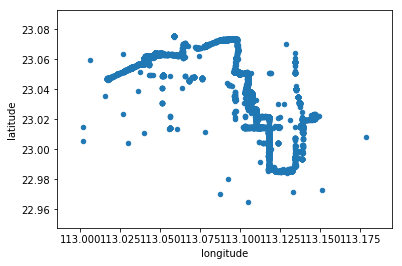

In [106]:
stop_loc_df.plot.scatter("longitude","latitude")
# stop_loc_df.head()

In [119]:
count = 0
stop_loc_df["nearby"] = 0
for i in stop_loc_df.index:
#     count += 1
#     if count%1000 == 0:
#         print count
    stop_loc_df.loc[i,"nearby"] = stop_loc_df[(stop_loc_df["longitude"] > (stop_loc_df.loc[i,"longitude"] - 0.00005))&
                                              (stop_loc_df["longitude"] < (stop_loc_df.loc[i,"longitude"] + 0.00005))&
                                              (stop_loc_df["latitude"] > (stop_loc_df.loc[i,"latitude"]-0.00005))&
                                              (stop_loc_df["latitude"] < (stop_loc_df.loc[i,"latitude"]+0.00005))].shape[0]

# +-0.00005 17 meters
# count
stop_loc_df.head()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000


,longitude,latitude,nearby
raw_index,,,
0,113.14631,23.02181,176
35474,113.14628,23.02175,233
35878,113.14630,23.02175,211
36070,113.14626,23.02175,262
36343,113.14630,23.02173,180


In [155]:
# stop_loc_df.sort_values("nearby",ascending = False).head()
stop_loc_df_unique = stop_loc_df.drop_duplicates().sort_values("nearby",ascending = False)
stop_loc_df_unique = stop_loc_df_unique[(stop_loc_df_unique["nearby"]<300)&(stop_loc_df_unique["nearby"]>20)]

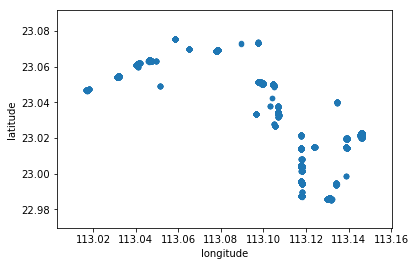

In [156]:
stop_loc_df_unique.plot.scatter("longitude","latitude")
# stop_loc_df_unique.shape

In [84]:
# stop_loc_df["count"] = 1
# stop_loc_df

# stop_loc_df.groupby([0,1]).ngroups
# pd.unique(stop_loc_df[[0,1]]).values.ravel()
# stop_loc_df.unique()

KeyError: 0

In [21]:

last_loc = (bus1.loc[0][4], bus1.loc[0][5])

caching = []
for i in bus1.index:
    if bus1.loc[i][4] == last_loc[0] and bus1.loc[i][5] == last_loc[1]:
        caching.append(i)
    else:
        if len(caching) > 3:
            not_working.append(caching)
        caching = []
        last_loc = (bus1.loc[i][4], bus1.loc[i][5])

print len(not_working)

2073


In [70]:
# print len(bus1)
plt.figure(figsize=(10,8))
stop_index = [i[0] for i in not_working]
stop_loc = [(bus1.loc[s,4],bus1.loc[s,5]) for s in stop_index]
stop_loc_df = pd.DataFrame(stop_loc)
# stop_loc_df

In [71]:
stop_loc_df.plot.scatter(0,1)

NameError: name 'stop_loc_df' is not defined

In [61]:
s=s.reset_index()

In [62]:
s

,level_0,index,0,1,count
0,0,0,113.14631,23.02181,1
1,1,1,113.14628,23.02175,1
2,2,2,113.14630,23.02175,1
3,3,3,113.14626,23.02175,1
4,4,4,113.14630,23.02173,1
5,5,5,113.14636,23.02170,1
6,6,6,113.14648,23.02181,1
7,7,7,113.14626,23.02160,1
8,8,8,113.14495,23.01985,1
9,9,9,113.13876,23.01488,1


In [21]:
from urllib2 import Request, urlopen, URLError

In [63]:
stop_loc = pd.read_csv("data/116_stop.csv", header = 0)
stop_loc.head()

,name lon
"�����й�����Ŧվ\t""113.14303","22.99001"""
"������\t""113.141601","22.9893"""
"������·\t""113.138105","22.988861"""
"����·��\t""113.134698","22.988911"""
"�غ�ܰͥ\t""113.130975","22.990432"""


In [64]:
stop_loc = stop_loc.reset_index()
# stop_loc.head()

In [65]:
stop_loc["lon"] = stop_loc["index"].apply(lambda x:float(x.split("\t")[1][1:]))
stop_loc["index"] = stop_loc["index"].apply(lambda x:x.split("\t")[0])
stop_loc["name\tlon"] = stop_loc["name\tlon"].apply(lambda x:float(x[:-1]))


In [66]:
stop_loc.columns = ["name","lat","lon"]
stop_loc.head()


,name,lat,lon
0,�����й�����Ŧվ,22.990010,113.143030
1,������,22.989300,113.141601
2,������·,22.988861,113.138105
3,����·��,22.988911,113.134698
4,�غ�ܰͥ,22.990432,113.130975


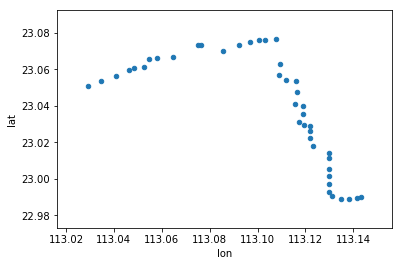

In [69]:
stop_loc.plot(x="lon",y="lat", kind = "scatter")

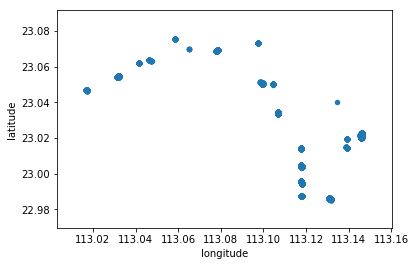

In [153]:
stop_loc_df_unique.plot.scatter("longitude","latitude")

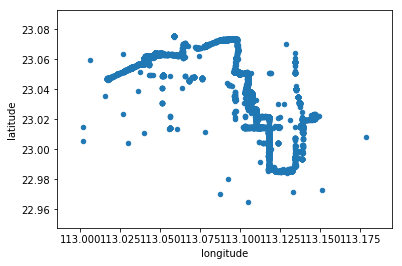

In [154]:
stop_loc_df.plot.scatter("longitude","latitude")

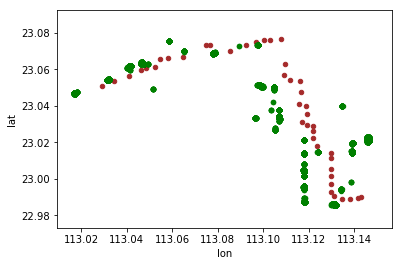

In [167]:
stop_loc_df_unique.columns = ["lon","lat","nearby"]
plt.figure()
# stop_loc.plot(x="lon",y="lat", kind = "scatter")
# stop_loc_df_unique.plot(x="longitude", y= "latitude", kind = "scatter",secondary_y=True, style='g' )
# with pd.plot_params.use('x_compat', True):
a = stop_loc.plot(x="lon",y="lat", kind = "scatter",  color = "brown")
stop_loc_df_unique.plot(x="lon", y= "lat", kind = "scatter", color = "green",ax = a)
    

In [159]:
stop_loc_df_unique.head()

,longitude,latitude,nearby
raw_index,,,
8682025,113.13155,22.98566,299
2917945,113.14618,23.02153,299
1306389,113.14571,23.02163,299
6831855,113.01735,23.04670,299
8057153,113.14625,23.02163,298
